In [1]:
from nltk import sent_tokenize, pos_tag
from nltk.tokenize import TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk.sentiment.util import mark_negation
from string import punctuation
from IPython.display import display
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

### Sentiment Scoring Using SentiWordNet

In [2]:
def penn_to_wn(tag):
    """
        Convert between the PennTreebank tags to simple Wordnet tags
    """
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return None

In [3]:
def get_sentiment_score(text):
    
    """
        This method returns the sentiment score of a given text using SentiWordNet sentiment scores.
        input: text
        output: numeric (double) score, >0 means positive sentiment and <0 means negative sentiment.
    """    
    total_score = 0
    #print(text)
    raw_sentences = sent_tokenize(text)
    #print(raw_sentences)
    
    for sentence in raw_sentences:

        sent_score = 0     
        sentence = str(sentence)
        #print(sentence)
        sentence = sentence.replace("<br />"," ").translate(str.maketrans('','',punctuation)).lower()
        tokens = TreebankWordTokenizer().tokenize(text)
        tags = pos_tag(tokens)
        for word, tag in tags:
            wn_tag = penn_to_wn(tag)
            if not wn_tag:
                continue
            lemma = WordNetLemmatizer().lemmatize(word, pos=wn_tag)
            if not lemma:
                continue
            synsets = wn.synsets(lemma, pos=wn_tag)
            if not synsets:
                continue
            synset = synsets[0]
            swn_synset = swn.senti_synset(synset.name())
            sent_score += swn_synset.pos_score() - swn_synset.neg_score()

        total_score = total_score + (sent_score / len(tokens))

    
    return (total_score / len(raw_sentences)) * 100

In [4]:
reviews = pd.read_csv("small_corpus.csv")

In [5]:
reviews.shape

(4500, 12)

In [6]:
reviews.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,1.0,False,"02 27, 2002",AAQMWWN5UDJM5,B00005N9CQ,Zorin,"This game [stinks]. Don't buy it. The graphics are par for a 64 bit system, not PS2. The play control is beyond terrible. There is no variation on the weather... it is always sunny and clear, and the missions are long-winded and stupid. The music is annoying as well. Don't waste the [money] even to rent it.",Complete wate of time,1014768000,NaN,NaN,NaN
1,1.0,True,"08 28, 2015",A350SO127HDQSQ,B00O65I2VY,Derrick Black,"Doesn't work when connected to PC, as simple as that. I used the same cord with another controller and it worked fine, so it's the controller they shipped me. Bought from Amazon, disappointed.",Buyer Beware,1440720000,NaN,NaN,NaN
2,1.0,False,"06 26, 2009",A3ERSDUGJX7BGC,B0015RWPWS,PM,I have tried repeatedly to use this in my balance board. I have recharged this several times and have never been able to get it to work in the balance board.,Didn't work for me.,1245974400,NaN,NaN,NaN
3,1.0,False,"12 22, 2010",A1PBW0R798CBKR,B002DC8GT0,24joshua15,"I know there are some out there who enjoy this game, but I had to chime in on them and spoil the fun a little (for the sake of those who might spend $20 on this game). First of all, the game is targeting teenagers with it's graphics. The cover shows two young children with mom and dad playing the game and having a fun time. Nobody looks like that when they play this game, LOL. The interface is very poor. While this could be a game that builds critical thinking - it wouldn't be for young children AT ALL. Maybe my husband and I could play this without the kids... maybe a teenager would enjoy this, but the cover implies something totally different. Last, but not least, my daughters (ages 9 and 10) were disgusted with the suggestive body language of the female characters and their looks. Really, it looks like something made by MTV - graphic wise.",Bad Advertisement is the Culprit,1292976000,17,NaN,NaN
4,1.0,True,"11 20, 2013",A2VKK5PI79ML1J,B0016NRS8M,Jimmy Hitchcock,"This game is completely terrible. There are no redeeming qualities to it. Two Worlds 2, the sequel to Two Worlds (or is it One World 2) is one of the worst games to grace this generation of gaming.\n\nTo start, Two Worlds (1) was a terrible game to begin with and an even worse port to the Xbox. It's surprising that they even got enough money to make the sequel. If you want a better gaming experience than Two Worlds 2 however, play Two Worlds online with a friend because that's all there is.\n\nTwo Worlds 2 did so many things wrong. From a bad story to a terrible questing system, Two Worlds looks shiny and new, but you can't cover up the horrible failure that it is.\n\nYou may think I'm being hard on this game, but trust me, I played through the entire thing. It tested my patience, and my sanity.",South peak has done it again...,1384905600,2,{'Platform:': ' Xbox 360'},NaN


In [7]:
reviews.dropna(subset=['reviewText'], inplace=True)

In [8]:
reviews.shape

(4500, 12)

In [9]:
reviews['swn_score'] = reviews['reviewText'].apply(lambda text : get_sentiment_score(text))

In [10]:
reviews[['reviewText','swn_score']].sample(2)

,reviewText,swn_score
4171,"Dead Space 2 is a third-person survival action game with some light RPG elements (upgrading your equipment). This game encourages a slow pace, not run-and-gun. I played on the easiest difficulty which still has some difficult spots if you don't have quick reflexes. I recommend you seek some video reviews of the game to see if you might like it. It is a well executed game in terms of art, gameplay, and sound. The story is generic but has some good moments. It took me 20 hours to finish but I spent a lot of time looking at the scenery. There is a 'New Game Plus' mode for subsequent playthroughs. There is also a brutal hard core difficulty (only 3 saves allowed, no checkpoints) for the masochists/experts. Highly recommended.",-0.443262
3220,Thanks!,6.250000


In [11]:
reviews[['reviewText','swn_score']].sample(2)

,reviewText,swn_score
819,"I have played Sims 3 on the PC and the X-Box, however Sims 3 for the Wii is a big letdown, unable to create your own houses, very limited wall papers floors items, makes for a very dull game, and there is no challenge/story mode, like found on the X-Box. If you want Sims 3, get it for pc or X-box and totally give it a miss on the Wii",-0.487013
232,"Once you finish the main campaign, there's nothing left to do unless you enjoy an endless bulls*** grind.\n\nGame devs are catering to whiny pissbaby Greifers while s***ting on the PVE players that make up the bulk of the community.\n\nGame is going to be dead in a month.\n\nDon't waste your money, it's literally worse than Destiny.",0.195312


D:\anaconda1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


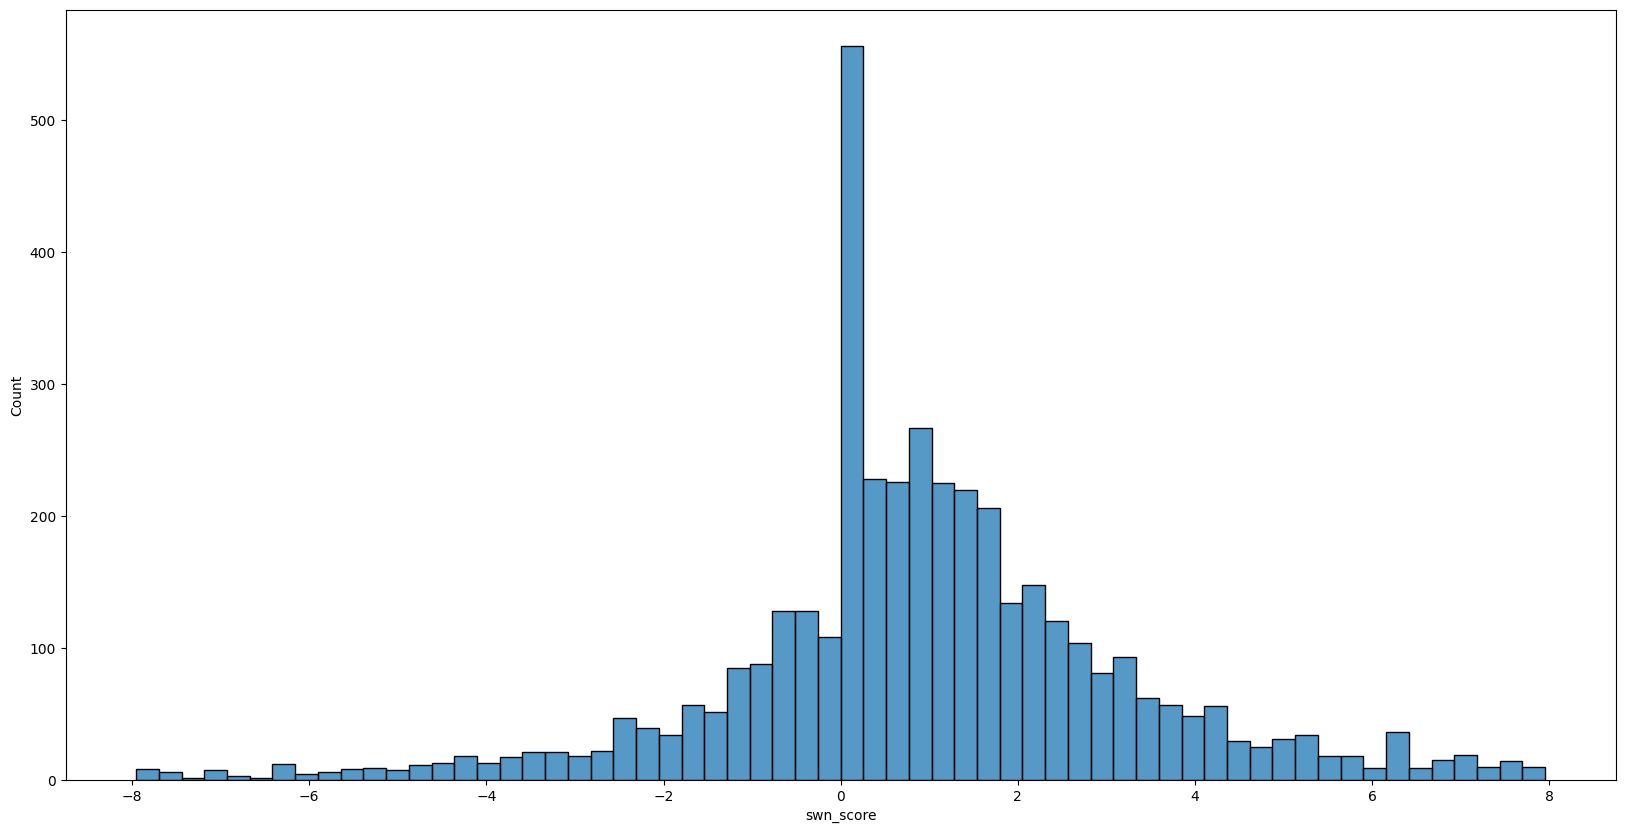

In [12]:
fig , ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))
sns.histplot(x='swn_score', data=reviews.query("swn_score < 8 and swn_score > -8"), ax=ax)
plt.show()

In [13]:
reviews['swn_sentiment'] = reviews['swn_score'].apply(lambda x: "positive" if x>1 else ("negative" if x<0.5 else "neutral"))

In [14]:
reviews['swn_sentiment'].value_counts(dropna=False)

swn_sentiment
positive    2160
negative    1855
neutral      485
Name: count, dtype: int64

<Axes: xlabel='overall', ylabel='count'>

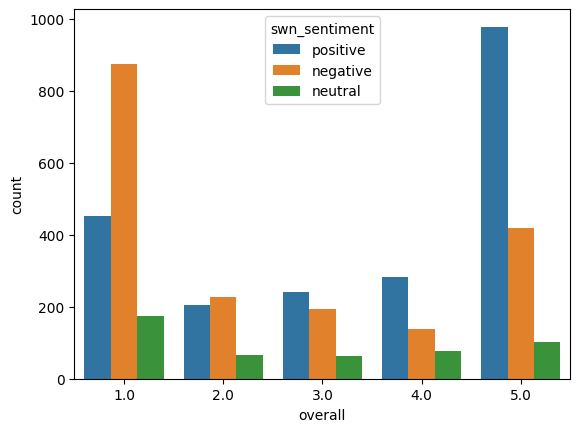

In [15]:
sns.countplot(x='overall', hue='swn_sentiment' ,data = reviews)

D:\anaconda1\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda1\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda1\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='swn_sentiment', ylabel='overall'>

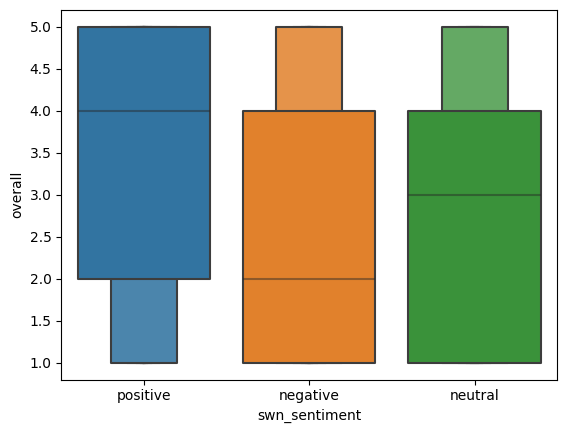

In [16]:
sns.boxenplot(x='swn_sentiment', y='overall', data = reviews)

D:\anaconda1\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda1\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda1\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda1\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('

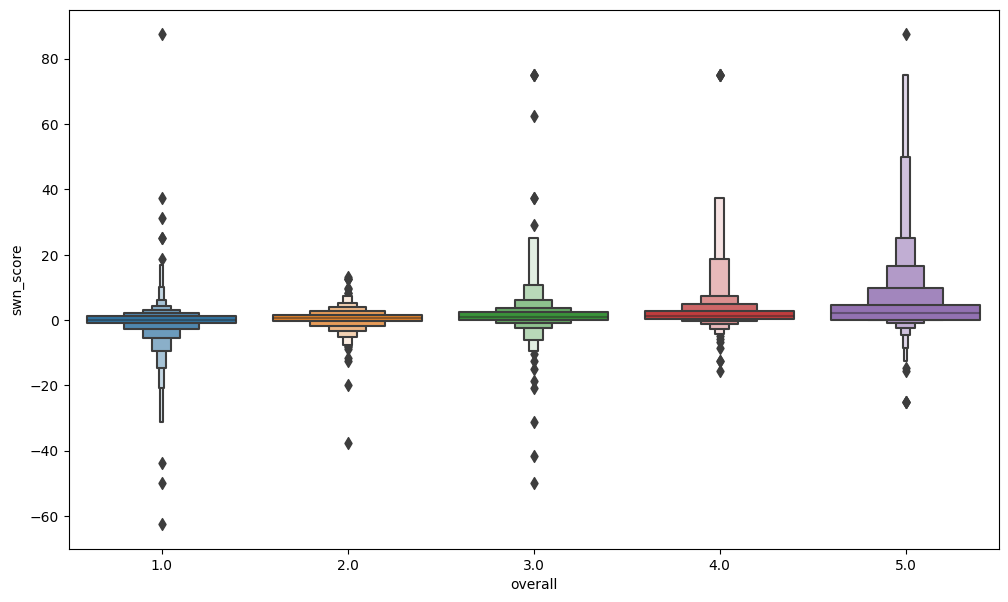

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (12,7))
sns.boxenplot(x='overall', y='swn_score', data = reviews, ax=ax)
plt.show()

In [18]:
reviews['true_sentiment'] = \
    reviews['overall'].apply(lambda x: "positive" if x>=4 else ("neutral" if x==3 else "negative"))

In [19]:
y_swn_pred, y_true = reviews['swn_sentiment'].tolist(), reviews['true_sentiment'].tolist()

In [20]:
len(y_swn_pred), len(y_true)

(4500, 4500)

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_swn_pred)

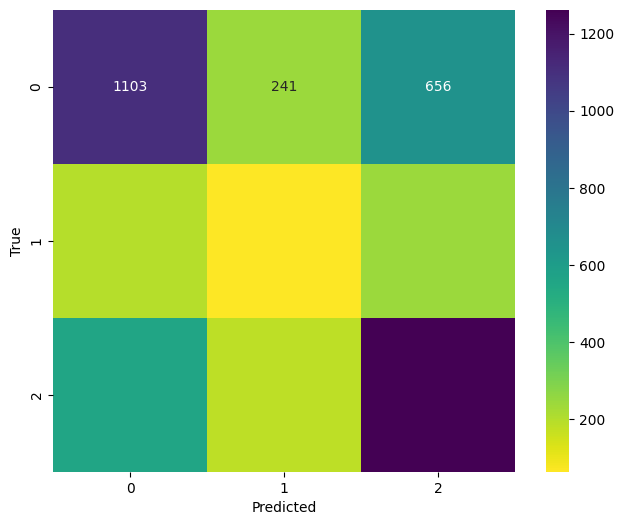

In [22]:
fig , ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
sns.heatmap(cm, cmap='viridis_r', annot=True, fmt='d', square=True, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True');

## Performance Assessment

### Negative Sentiment Prediction Assessment

In [23]:
tp, tn, fp, fn = 1088, 70+242+142+1310, 265+647, 188+547

In [24]:
recall = tp / (tp+fn)
specifity = tn / (tn+fp)
precision = tp/(tp+fp)
f1 = (2*tp) / (2*tp + fp + fn)

In [25]:
print("recall: {}\nprecission: {}\nf1 score: {}".format(recall, precision, f1))

recall: 0.5968184311574328
precission: 0.544
f1 score: 0.5691865027465342


### Positive Sentiment Prediction Assessment

In [26]:
tp, tn, fp, fn = 1310, 1088+265+70+188, 242+647, 142+547

In [27]:
recall = tp / (tp+fn)
specifity = tn / (tn+fp)
precision = tp/(tp+fp)
f1 = (2*tp) / (2*tp + fp + fn)

In [28]:
print("recall: {}\nprecission: {}\nf1 score: {}".format(recall, precision, f1))

recall: 0.655327663831916
precission: 0.5957253296953161
f1 score: 0.6241067174845164


## Sentiment Scoring Model Using NLTK Opinion Lexicon

In [29]:
import nltk
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize, sent_tokenize

In [30]:
nltk.download("opinion_lexicon")

[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     C:\Users\wama\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\opinion_lexicon.zip.


True

In [31]:
pos_words = list(opinion_lexicon.positive())
neg_words = list(opinion_lexicon.negative())

In [32]:
def get_sentiment_score_oplex(text):
    
    """
        This method returns the sentiment score of a given text using nltk opinion lexicon.
        input: text
        output: numeric (double) score, >0 means positive sentiment and <0 means negative sentiment.
    """    
    total_score = 0

    raw_sentences = sent_tokenize(text)
    
    for sentence in raw_sentences:

        sent_score = 0     
        sentence = str(sentence)
        sentence = sentence.replace("<br />"," ").translate(str.maketrans('','',punctuation)).lower()
        tokens = TreebankWordTokenizer().tokenize(text)
        for token in tokens:
            sent_score = sent_score + 1 if token in pos_words else (sent_score - 1 if token in neg_words else sent_score)
        total_score = total_score + (sent_score / len(tokens))

    
    return total_score

In [33]:
reviews['oplex_sentiment_score'] = reviews['reviewText'].apply(lambda x: get_sentiment_score_oplex(x))

D:\anaconda1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


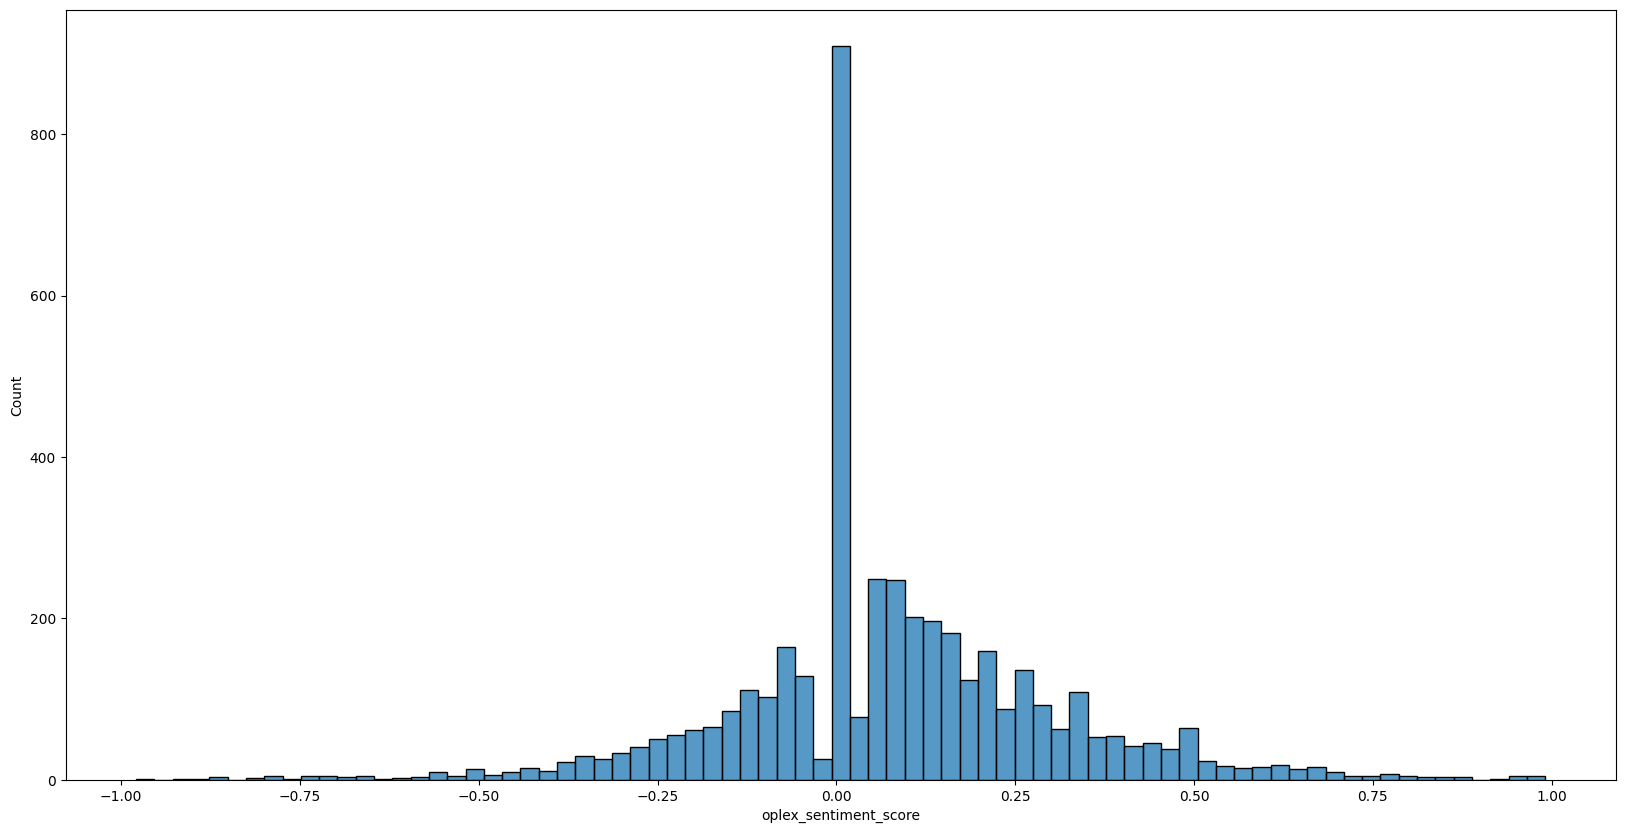

In [34]:
fig , ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))
sns.histplot(x='oplex_sentiment_score',\
             data=reviews.query("oplex_sentiment_score < 1 and oplex_sentiment_score>-1"), ax=ax)
plt.show()

In [35]:
reviews['oplex_sentiment'] = \
    reviews['oplex_sentiment_score'].apply(lambda x: "positive" if x>0.1 else ("negative" if x<0 else "neutral"))

In [36]:
reviews['oplex_sentiment'].value_counts(dropna=False)

oplex_sentiment
positive    1852
neutral     1527
negative    1121
Name: count, dtype: int64

<Axes: xlabel='overall', ylabel='count'>

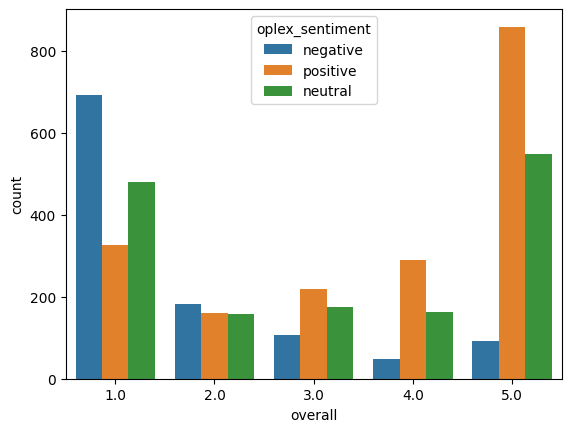

In [37]:
sns.countplot(x='overall', hue='oplex_sentiment' ,data = reviews)

D:\anaconda1\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda1\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda1\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='oplex_sentiment', ylabel='overall'>

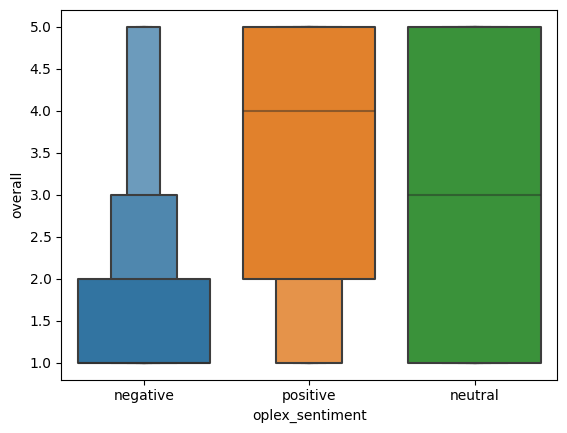

In [38]:
sns.boxenplot(x='oplex_sentiment', y='overall', data = reviews)

D:\anaconda1\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda1\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda1\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda1\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('

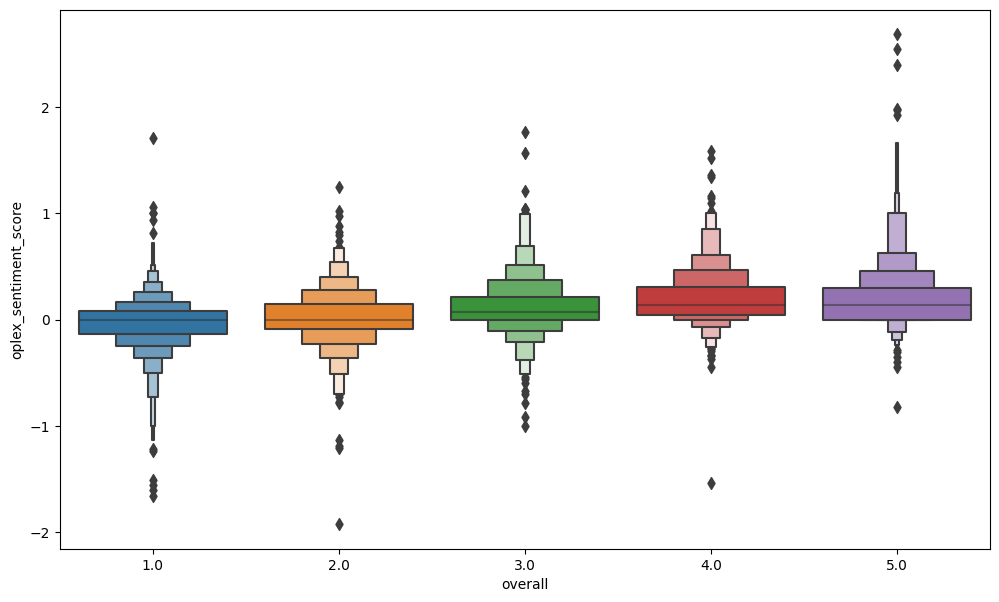

In [39]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (12,7))
sns.boxenplot(x='overall', y='oplex_sentiment_score', data = reviews, ax=ax)
plt.show()

In [40]:
y_oplex_pred = reviews['oplex_sentiment'].tolist()

In [41]:
oplex_cm = confusion_matrix(y_true, y_oplex_pred)

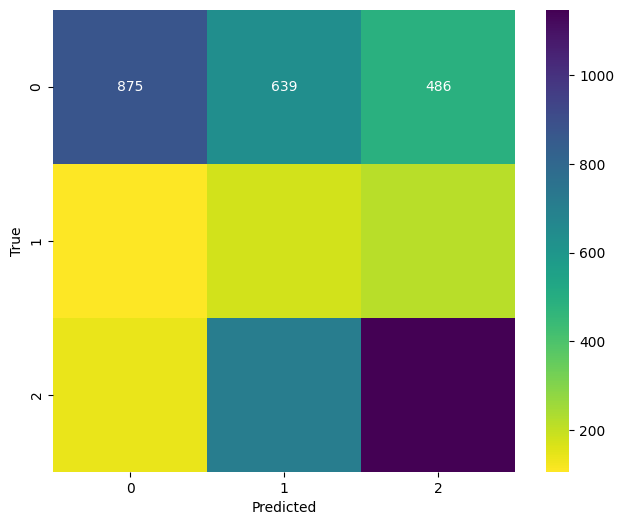

In [42]:
fig , ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
sns.heatmap(oplex_cm, cmap='viridis_r', annot=True, fmt='d', square=True, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True');

In [43]:
oplex_cm = list(oplex_cm.ravel())

In [44]:
oplex_cm

[875, 639, 486, 106, 176, 218, 140, 712, 1148]

### Negative Label Assessment

In [45]:
tp, tn, fp, fn = 804, 195+199+686+1181, 106+132, 701+495

In [46]:
recall = tp / (tp+fn)
specifity = tn / (tn+fp)
precision = tp/(tp+fp)
f1 = (2*tp) / (2*tp + fp + fn)

print("recall: {}\nprecission: {}\nf1 score: {}".format(recall, precision, f1))

recall: 0.402
precission: 0.7715930902111324
f1 score: 0.5285996055226825


### Positive Label Assessment

In [47]:
tp, tn, fp, fn = 1181, 804+701+106+195, 495+199, 132+686

In [48]:
recall = tp / (tp+fn)
specifity = tn / (tn+fp)
precision = tp/(tp+fp)
f1 = (2*tp) / (2*tp + fp + fn)

print("recall: {}\nprecission: {}\nf1 score: {}".format(recall, precision, f1))

recall: 0.5907953976988495
precission: 0.6298666666666667
f1 score: 0.6097057305110997
